In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import colorlover as cl
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_15000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_50000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_5000.csv


In [2]:
! pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.9 MB/s eta 0:00:00


In [3]:
df = pd.read_csv("/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_15000.csv")

In [4]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1108,1,37,88.11364,0,1,1,100,0,1,...,1,1,0,0,0,389,320,734,737,1
1,1079,0,43,66.77075,0,0,0,100,0,1,...,0,2,0,1,1,318,432,912,1213,0
2,492,1,34,82.91725,0,0,0,90,0,1,...,1,2,0,1,1,326,524,660,835,0
3,1191,1,41,98.91817,0,0,0,81,0,1,...,1,3,0,1,0,318,232,1131,982,1
4,1141,3,47,53.61717,0,1,0,100,0,0,...,0,1,0,1,0,280,337,515,679,0


In [5]:
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

## <div style="text-align: center"> <b>UNIVARIATE ANALYSIS</b></div>

## trt: Treatment Indicator

***About***
<div>
    <p>
        The treatment indicator provides information about the type of antiretroviral treatment regimen patients in the dataset are receiving:
    </p>
    <ul>
        <li>0 = ZDV only
            <ul>
                <li>Patients with this indicator are being treated only with Zidovudine (ZDV), also known as AZT.</li>
            </ul>
        </li>
        <li>1 = ZDV + ddI
            <ul>
                <li>Patients with this indicator are being treated with a combination of Zidovudine (ZDV) and Didanosine (ddI). The combination therapy is often used to enhance the efficacy of treatment by using drugs with different mechanisms of action.</li>
            </ul>
        </li>
        <li>2 = ZDV + Zal
            <ul>
                <li>Patients with this indicator are being treated with a combination of Zidovudine (ZDV) and Zalcitabine (Zal). The combination of ZDV and Zal is another strategy to improve treatment effectiveness and delay the progression of the disease.</li>
            </ul>
        </li>
        <li>3 = ddI only
            <ul>
                <li>Patients with this indicator are being treated only with Didanosine (ddI). This might be an alternative regimen for patients who cannot tolerate ZDV or for whom ZDV is not effective.</li>
            </ul>
        </li>
    </ul>
</div>


***Conclusions***

In [6]:
df['trt'].value_counts()

trt
0    5550
3    4149
2    3182
1    2119
Name: count, dtype: int64

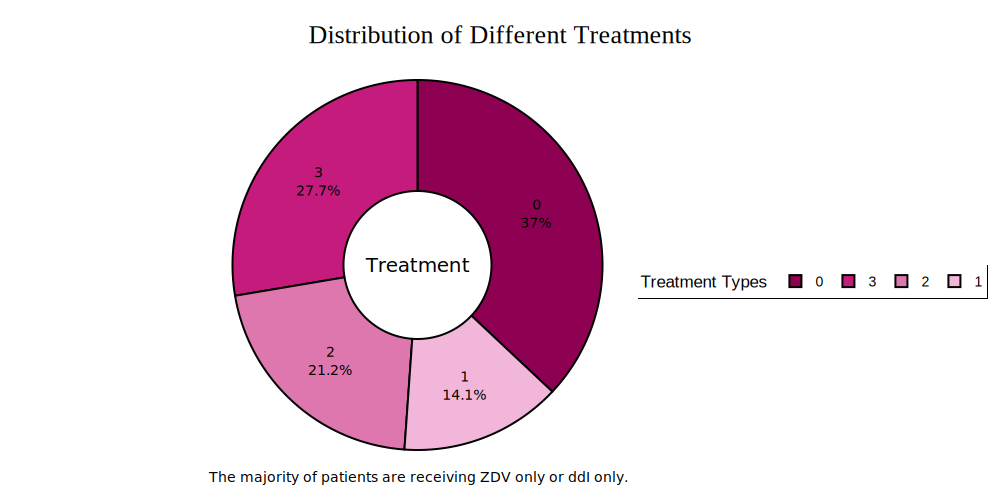

In [7]:
trt = df['trt'].value_counts().reset_index()
trt.columns = ['trt', 'count']

# Choose a diverging palette
palette = cl.scales['11']['div']['PiYG']

# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=trt['trt'],
    values=trt['count'],
    hole=.4,
    marker=dict(colors=palette, line=dict(color='#000000', width=2)),
    hoverinfo="label+percent+value",
    textinfo="label+percent",
    textfont=dict(size=14, color='#000000')  # Adjust text color
)])

# Update layout
fig.update_layout(
    title_text="Treatment Distribution",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000", 
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff',  
    annotations=[dict(text='Treatment', x=0.5, y=0.5, font_size=20, showarrow=False, font=dict(color="#000000"))],
    showlegend=True,
    legend_title_text='Treatment Types',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Arial",
            size=14,
            color="#000000"  
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000",  
        borderwidth=0.5,
        orientation="h"  
    )
)

# Increase the width of the page
fig.update_layout(width=1000)

# Adding a more vibrant title and better spacing
fig.update_layout(
    title={
        'text': "Distribution of Different Treatments",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Add observation/interpretation
fig.add_annotation(
    text="The majority of patients are receiving ZDV only or ddI only.",
    x=0.5,
    y=-0.1,
    showarrow=False,
    font=dict(color="#000000", size=14)  # Adjust text color
)

# Show the pie chart
fig.show('svg')

----------------------------------------------------------------------------------------------------------------------------------------------------------


## Age


***Conclusions***

- *It can be seen that age is normally distributed*

- *There are no missing values*

- *Max values goes up to 68 but some outliers are present in the data*

- *mean and median are about the same hence we can conclude that the outliers are not affecting the data*

In [8]:
df['age'].describe()

count    15000.000000
mean        34.273800
std          7.074134
min         12.000000
25%         29.000000
50%         34.000000
75%         39.000000
max         68.000000
Name: age, dtype: float64

*Median and mean are around the same hence it seems like the distribution is normal.*

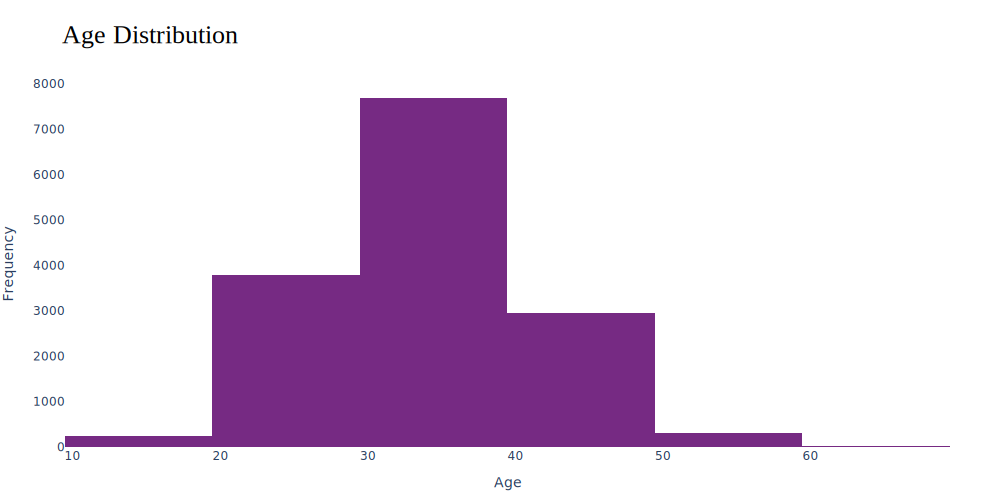

In [9]:
palette = cl.to_rgb(cl.scales['10']['div']['PRGn'])

# Create the histogram
fig = go.Figure(data=[go.Histogram(
    x=df['age'],
    marker=dict(color=palette[1]),  
    nbinsx=10
)])

fig.update_layout(
    title_text="Age Distribution",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff',  
    xaxis=dict(title="Age"),
    yaxis=dict(title="Frequency"),
)

fig.update_layout(
    title={
        'text': "Age Distribution",
        'y':0.95,
        'x':0.15,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.update_layout(width=1000)

# Show the pie chart
fig.show('svg')

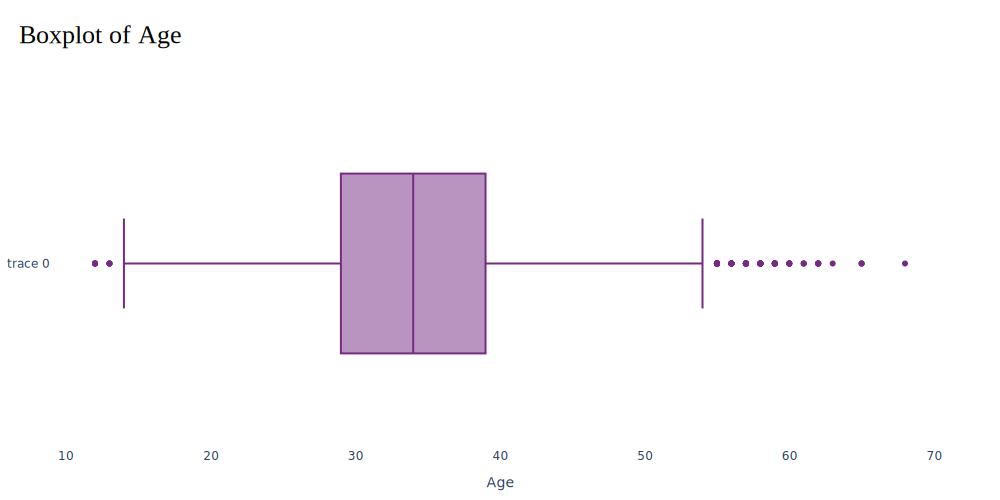

In [10]:
fig = go.Figure(data=[go.Box(
    x=df['age'],
    marker=dict(color=palette[1])
)])

fig.update_layout(
    title_text="Boxplot of Age",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff',  
    xaxis=dict(title="Age"),
)

fig.update_layout(
    title={
        'y':0.95,
        'x':0.10,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)



fig.update_layout(width=1000)

fig.show('svg')

*Some outliers are present after 54*

----------------------------------------------------------------------------------------------------------------------------------------------------------

## wtkg : Weight (in Kgs)

***Conclusions***
- *Most of the outliers are present beyond the weight of 100kg*

- *The distribution is slightly positively skewewd*

- "No missing values"

***Hypothesis***

- *As most of the outliers in the Age column are present beyond the age of 60, hence maybe most of the people belonging to that age group are over 100 kg*

In [11]:
df['wtkg'].describe()

count    15000.000000
mean        76.019604
std         12.170759
min         42.256390
25%         68.323125
50%         74.114225
75%         81.309035
max        141.612390
Name: wtkg, dtype: float64

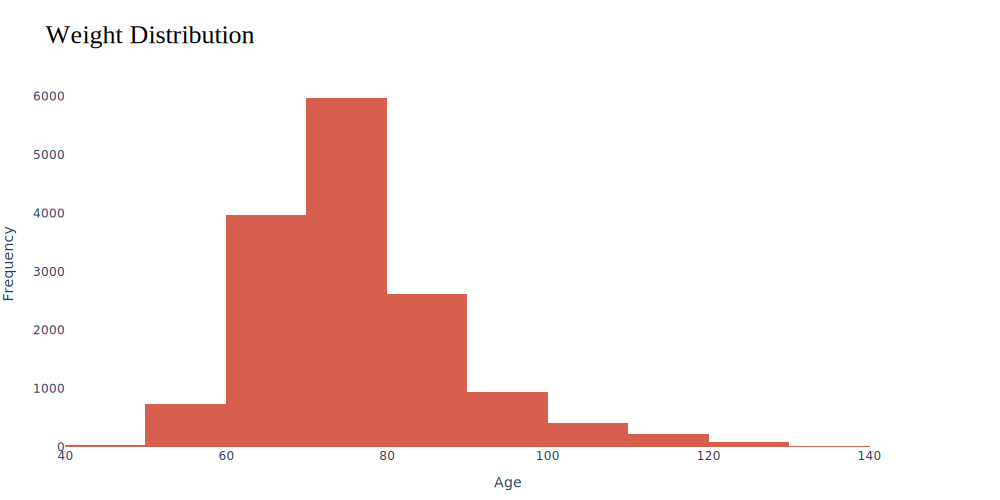

In [12]:
palette = cl.to_rgb(cl.scales['10']['div']['RdGy'])

# Create the histogram
fig = go.Figure(data=[go.Histogram(
    x=df['wtkg'],
    marker=dict(color=palette[2]),  # Choose the first color from the palette
    nbinsx=10
)])

# Update layout for better appearance
fig.update_layout(
    title_text="Weight Distribution",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  # Adjust title font color for better visibility
    paper_bgcolor='#ffffff',  # Set the background color to a warm white shade (#faf0e6)
    plot_bgcolor='#ffffff',  # Make sure the plot area also has a consistent background
    xaxis=dict(title="Age"),
    yaxis=dict(title="Frequency"),
)

# Adding a more vibrant title and better spacing
fig.update_layout(
    title={
        'text': "Weight Distribution",
        'y':0.95,
        'x':0.15,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.update_layout(width=1000)

# Show the pie chart
fig.show('svg')

*Almost normally distributed. Slightly positively skewed*

In [13]:
df['wtkg'].skew()

1.1910895370485162

*Close to 1*

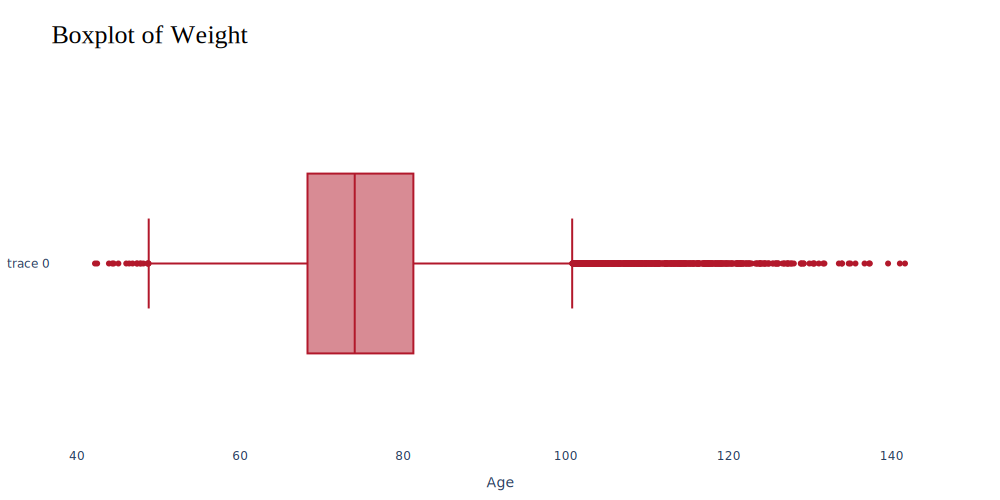

In [14]:
fig = go.Figure(data=[go.Box(
    x=df['wtkg'],
    marker=dict(color=palette[1])
)])

fig.update_layout(
    title_text="Boxplot of Weight",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff',  
    xaxis=dict(title="Age"),
)

fig.update_layout(
    title={
        'y':0.95,
        'x':0.15,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)



fig.update_layout(width=1000)

fig.show('svg')

*A great deal of outliers are present beyond 100*

----------------------------------------------------------------------------------------------------------------------------------------------------------

## hemo : Hemophilia 
***About***

<div>
<p>
It refers to a genetic disorder characterized by the inability of the blood to clot normally. Individuals with hemophilia lack certain proteins, known as clotting factors, that are essential for blood clotting. As a result, they are at an increased risk of excessive bleeding, both internally and externally, even from minor injuries.

 </p>  
</div>


***Conclusions***
- *Majority of the patients do not have hemophilia*

In [15]:
df['hemo'].value_counts()

hemo
0    14520
1      480
Name: count, dtype: int64

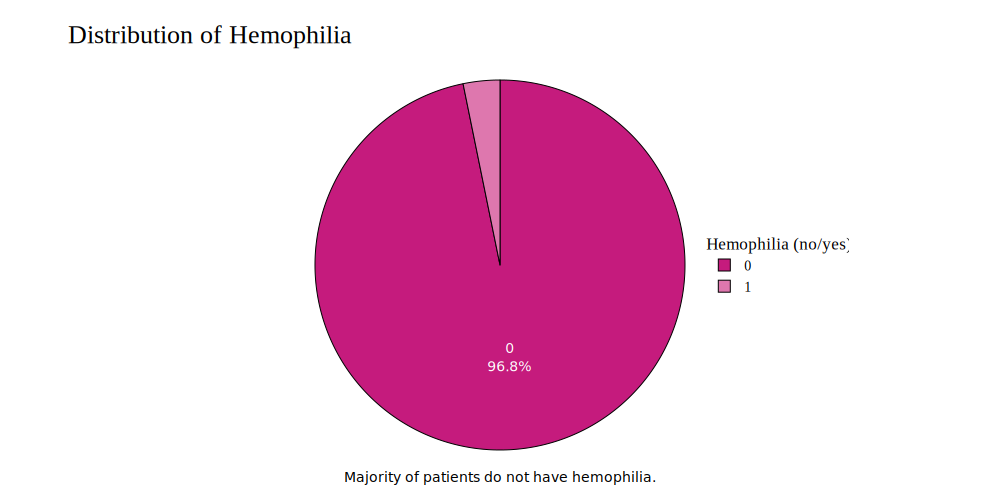

In [16]:
palette = cl.scales['9']['div']['PiYG']


hemo = df['hemo'].value_counts().reset_index()
hemo.columns = ['hemo', 'count']

fig = go.Figure(data=[go.Pie(
    labels=hemo['hemo'],
    values=hemo['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#FFFFFF')
)])


fig.update_layout(
    title_text="Hemophilia Distribution",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='Hemophilia (no/yes)',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.3,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of Hemophilia",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients do not have hemophilia.",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


----------------------------------------------------------------------------------------------------------------------------------------------------------

## homo : Homosexual Activity 
***About***

<div>
<p>
Homosexual activity refers to sexual activity between individuals of the same sex, often between men. Historically, homosexual activity has been associated with a higher risk of HIV transmission due to various factor.
 </p>  
</div>


***Conclusions***
- *Majority of the patients have indulged in homosexual activity*

In [17]:
df['homo'].value_counts()

homo
1    9791
0    5209
Name: count, dtype: int64

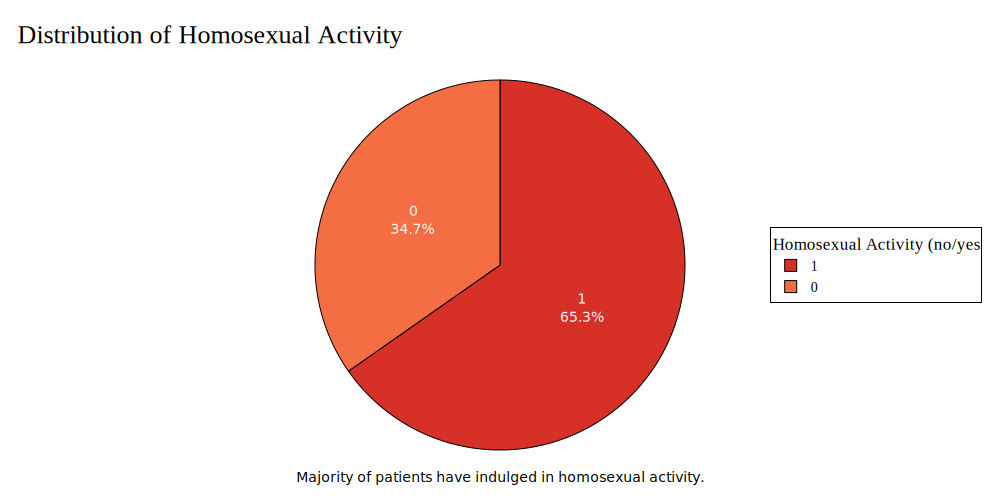

In [18]:
palette = cl.scales['9']['div']['RdYlBu']


homo = df['homo'].value_counts().reset_index()
homo.columns = ['homo', 'count']

fig = go.Figure(data=[go.Pie(
    labels=homo['homo'],
    values=homo['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#FFFFFF')
)])


fig.update_layout(
    title_text="Distribution of Homosexual Activity",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='Homosexual Activity (no/yes)',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.7,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of Homosexual Activity",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients have indulged in homosexual activity.",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


----------------------------------------------------------------------------------------------------------------------------------------------------------


## drugs :  history of intravenous (IV) drug use  

***Conclusions***
- *Majority of the patients do not have a history of drug use*

In [19]:
df['drugs'].value_counts()

drugs
0    13082
1     1918
Name: count, dtype: int64

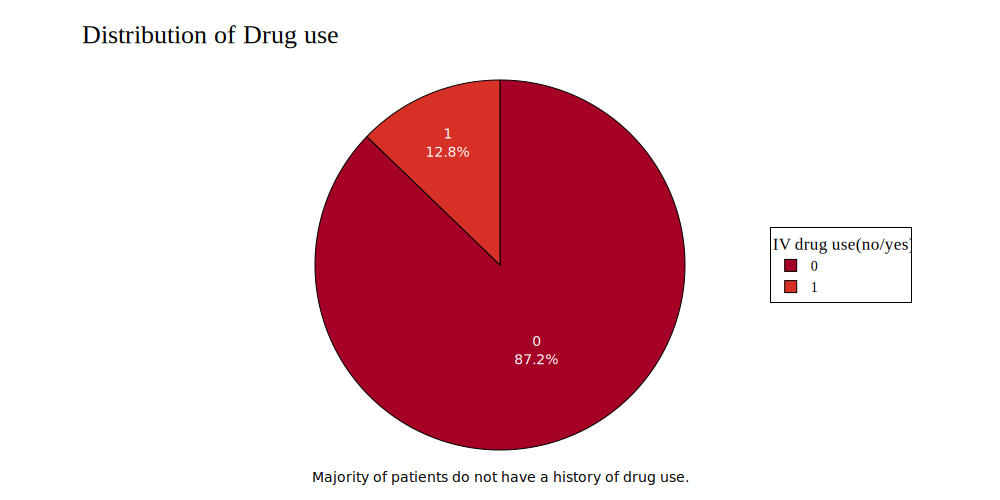

In [20]:
palette = cl.scales['11']['div']['RdYlGn']


drug = df['drugs'].value_counts().reset_index()
drug.columns = ['drugs', 'count']

fig = go.Figure(data=[go.Pie(
    labels=drug['drugs'],
    values=drug['count'],
    marker=dict(colors=palette, line=dict(color='#000000', width=1)),
    textinfo="label+percent",
    textfont=dict(size=14, color='#FFFFFF')
)])


fig.update_layout(
    title_text="Distribution of Drug Use",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff', 
    showlegend=True,
    legend_title_text='IV drug use(no/yes)',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Times New Roman",
            size=14,
            color="#000000"
        ),
        bgcolor="#ffffff",  
        bordercolor="#000000", 
        borderwidth=0.7,
        orientation="v" 
    )
)

fig.update_layout(width=1000)

fig.update_layout(
    title={
        'text': "Distribution of Drug use",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.add_annotation(
    text="Majority of patients do not have a history of drug use.",
    x=0.5,
    y=-0.10,
    showarrow=False,
    font=dict(color="#000000", size=14) 
)

# Show the pie chart
fig.show('svg')


----------------------------------------------------------------------------------------------------------------------------------------------------------

## karnof: Karnofsky score (on a scale of 0-100)

***About***
<div>
    <p>
The Karnofsky Performance Status (KPS) is a widely used measure of functional status and overall well-being in patients with various medical conditions, including AIDS  
    In the context of AIDS, the Karnofsky score is particularly relevant for evaluating the impact of the disease on a patient's functional status and determining appropriate treatment and supportive care interventions. The score is typically assessed through a brief clinical evaluation and is based on the patient's ability to perform activities such as self-care, ambulation, and work.

The Karnofsky score ranges from 0 to 100, with higher scores indicating better functional status and overall well-being. </p>
        <ul>
            <li>
                100: Normal, no evidence of disease, able to carry on normal activities without any restrictions.
            </li>
            <li>
                90: Able to carry on normal activities with minimal signs or symptoms of disease.
            </li>
            <li>
                80: Normal activities with some signs or symptoms of disease, but generally able to care for oneself.
            </li>
            <li>
                70: Cares for self but unable to carry on normal activities or to do active work.
            </li>
            <li>
                60: Requires occasional assistance, but is able to care for most personal needs.
            </li>
            <li>
                50: Requires considerable assistance and frequent medical care.
            </li>
            <li>
                40: Disabled, requires special care and assistance.
            </li>
            <li>
                30: Severely disabled, hospitalization is indicated, although death is not imminent.
            </li>
            <li>
                20: Very sick, hospitalization necessary, active supportive treatment necessary.
            </li>
            <li>
                10: Moribund, fatal processes progressing rapidly.
            </li>
            <li>
                0: Dead.
            </li>
        </ul>
</div>


***Conclusions***

- *The distribution is negatively skewed as most of the patients have karnfosky score of 100 which is a good sign*

In [21]:
df['karnof'].value_counts().sort_values(ascending = False)

karnof
100    10512
90      4106
80       117
81       103
82        60
79        60
83        18
91        15
78         8
77         1
Name: count, dtype: int64

*Most of the people have the karnofsky score of 100*

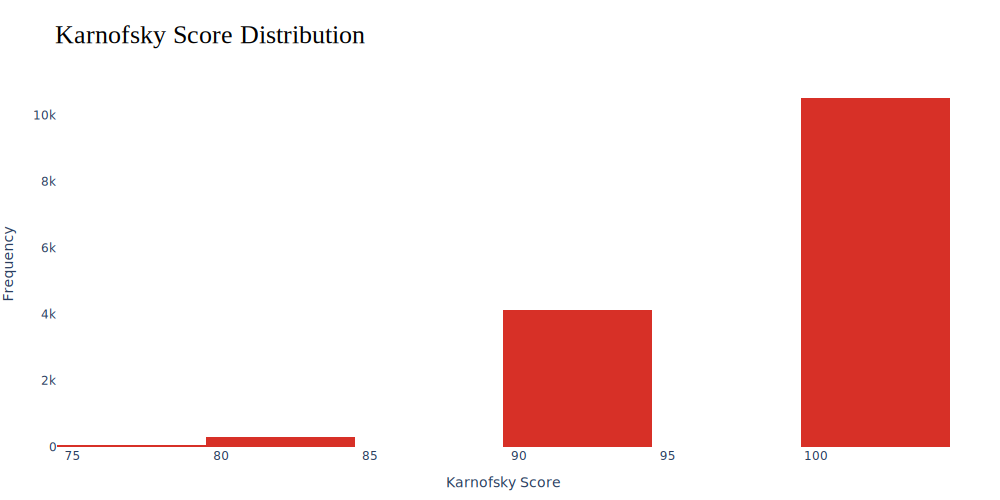

In [22]:
fig = go.Figure(data=[go.Histogram(
    x=df['karnof'],
    marker=dict(color=palette[1]),  # Use the second color from the palette
    nbinsx=10
)])

# Update layout
fig.update_layout(
    title_text="Karnofsky Score Distribution",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",
    paper_bgcolor='#ffffff',
    plot_bgcolor='#ffffff',
    xaxis=dict(title="Karnofsky Score"),
    yaxis=dict(title="Frequency"),
)

# Set title properties
fig.update_layout(
    title={
        'text': "Karnofsky Score Distribution",
        'y':0.95,
        'x':0.21,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Set the width of the figure
fig.update_layout(width=1000)

# Show the histogram
fig.show('svg')

In [23]:
fig = go.Figure(data=[go.Box(
    x=df['karnof'],
    marker=dict(color=palette[1])
)])

fig.update_layout(
    title_text="Boxplot of Karnofsky Score",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#000000",  
    paper_bgcolor='#ffffff',  
    plot_bgcolor='#ffffff',  
    xaxis=dict(title="Karnofsky score"),
)

fig.update_layout(
    title={
        'y':0.95,
        'x':0.15,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)



fig.update_layout(width=1000)

fig.show()

In [24]:
df['karnof'].skew()

-1.243294303843015

*negatively skewed data*

----------------------------------------------------------------------------------------------------------------------------------------------------------